# Installing the libraries

In [1]:
import pandas as pd 
import numpy as np
%pip install plotly 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

In [65]:
data = pd.read_csv('Thingiverse.csv', names = [ 'idx', 'URL', 'likes', 'tags', 'title', 'author_date', 'description']) #loading scraped data

In [66]:
data.drop('idx', axis = 1, inplace = True) #dropping pre-made index
data.head()

URL  likes  \
0  https://www.thingiverse.com/thing:4892417    726   
1  https://www.thingiverse.com/thing:4891164   3786   
2  https://www.thingiverse.com/thing:4886690   2276   
3  https://www.thingiverse.com/thing:4889702   2103   
4  https://www.thingiverse.com/thing:4897556   1989   

                                       tags                         title  \
0                                       NaN           TicTac Gun 2 (TTG2)   
1  art,black,Decoration,Homero Simpson,wall        Homero wall decoration   
2                                       NaN  Velux Aircon Exhaust Adapter   
3                                       NaN                     Door Stop   
4                 diy,gears,tool,tools,vise                  Fractal Vise   

                     author_date  \
0         by EaziG June 23, 2021   
1    by ignacio_gz June 21, 2021   
2  by NeilMonteiro June 15, 2021   
3      by Matearoa June 19, 2021   
4        by Borgey June 30, 2021   

                                         description  
0  Firstly, huge props to the original creator of...  
1  es sencillo de imprimir sin complicaciones.\nv...  
2  IMPORTANT\nI was pretty shocked to see this on...  
3  Holds a door open.\nMade a remix without screw...  
4  My take on the fractal vise that has been goin...

In [67]:
data.drop(data[data.author_date.isna()].index, axis = 0, inplace = True) 

### Data has author and date field merged together, sepaarating that

In [68]:
data['author'] = data.author_date.map(lambda x: x.split()[1: -3][0])
data['date'] = data.author_date.map(lambda x: " ".join(x.split()[-3: ]))
data.drop('author_date', axis = 1, inplace = True)
data.head(10)

URL  likes  \
0  https://www.thingiverse.com/thing:4892417    726   
1  https://www.thingiverse.com/thing:4891164   3786   
2  https://www.thingiverse.com/thing:4886690   2276   
3  https://www.thingiverse.com/thing:4889702   2103   
4  https://www.thingiverse.com/thing:4897556   1989   
5  https://www.thingiverse.com/thing:4900080   1916   
6  https://www.thingiverse.com/thing:4894474   1744   
7  https://www.thingiverse.com/thing:4892947   1647   
8  https://www.thingiverse.com/thing:4904044   1914   
9  https://www.thingiverse.com/thing:4888990   1491   

                                                tags  \
0                                                NaN   
1           art,black,Decoration,Homero Simpson,wall   
2                                                NaN   
3                                                NaN   
4                          diy,gears,tool,tools,vise   
5  Bottle cap,box,cap,container,Petbottle,pill co...   
6  beer,bottle opener,drink,fun,gift,mechanical,p...   
7  brushed,brushless,car,Chassis,hobbywing,openrc...   
8                          fractal,fractal vise,vise   
9                                                NaN   

                                     title  \
0                      TicTac Gun 2 (TTG2)   
1                   Homero wall decoration   
2             Velux Aircon Exhaust Adapter   
3                                Door Stop   
4                             Fractal Vise   
5  Mini Container with PET Bottle Cap Size   
6           Beer Counter V3, Bottle Opener   
7                    Chasis 1/10 Adaptable   
8                             Fractal Vise   
9                Kabel Manager v2 MAGNETIC   

                                         description        author  \
0  Firstly, huge props to the original creator of...         EaziG   
1  es sencillo de imprimir sin complicaciones.\nv...    ignacio_gz   
2  IMPORTANT\nI was pretty shocked to see this on...  NeilMonteiro   
3  Holds a door open.\nMade a remix without screw...      Matearoa   
4  My take on the fractal vise that has been goin...        Borgey   
5  【Mini Container with PET Bottle Cap Size】\nスクリ...    Tokyo_Bird   
6  Hey there,\nthis is the third Version of my 3d...      RubenMts   
7  FILAMENTS:\nGris chasis: https://www.impresora...      dukedoks   
8  A 3D printed fractal vise inspired by the orig...  TeachingTech   
9  Cable Manager\nSeen and remodeled on aliexpres...         caban   

            date  
0  June 23, 2021  
1  June 21, 2021  
2  June 15, 2021  
3  June 19, 2021  
4  June 30, 2021  
5  July 03, 2021  
6  June 26, 2021  
7  June 24, 2021  
8  July 09, 2021  
9  June 18, 2021

# Exploratory Data Analysis
## Plotting number of empty values in all the columns

In [69]:
data.isna().sum()

URL               0
likes             0
tags           3076
title             0
description     372
author            0
date              0
dtype: int64

In [70]:
px.histogram(data.isna())

## Box plot of likes suggest there are outliers which can have huge impact on inferences to be drawn

In [71]:
px.box(data.likes)

In [72]:
px.histogram(data.likes)

## Typical Pareto Distribution - After excluding the outliers

In [73]:
px.histogram(data[data.likes < 100].likes)

In [74]:
tags = []
for i in data.tags:
    try:
        tags.extend(i.split(','))
    except:
        pass
tags = pd.Series(tags)

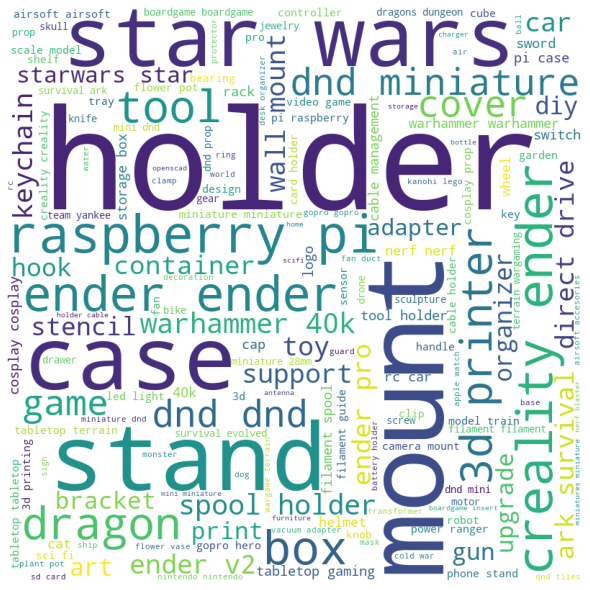

In [75]:
stopwords = set(STOPWORDS)
comment_words = ''
for val in tags:
	val = str(val)
	tokens = val.split()
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [76]:
data.description.fillna(' ', inplace = True)
data['desc_len'] = data['description'].map(lambda x : len(x.split(' ')))

In [77]:
px.scatter(data.desc_len)

In [78]:
px.histogram(data[data.desc_len < 1000].desc_len)

## Data Description
<ul>
<li>Obtaining length of description </li>
<li>Making regression plot with no of likes on an image </li>
<li>Calculting R-square </li>
</ul>
Inference drawn: The R-suare value obtained was very low (0.003) and hence the impact is minimal

In [79]:
import seaborn as sns 
# sns.regplot(data = data[data.likes < 100], x = 'likes', y = 'desc_len')
px.scatter(data[(data.likes < 100) & (data.desc_len < 1000)], x = 'likes', y = 'desc_len', trendline = "ols")

In [80]:
# data.tags.fillna(', '.join(tags.value_counts()[0:5].keys()), inplace = True)

In [97]:
data.dropna(axis = 0, inplace = True)
data.reset_index(inplace  = True)

## Number of tags
<ul>
<li>Obtaining no of tags used </li>
<li>Making regression plot with no of likes on an image </li>
<li>Calculting R-square </li>
</ul>
<strong> Inference drawn: The R-suare value obtained was higher (0.3) and there's a significant positive impact of number of tags used </strong>

In [86]:
data['no_of_tags'] = data.tags.map(lambda x: len(x.split(",")))

In [87]:
data

URL  likes  \
1     https://www.thingiverse.com/thing:4891164   3786   
4     https://www.thingiverse.com/thing:4897556   1989   
5     https://www.thingiverse.com/thing:4900080   1916   
6     https://www.thingiverse.com/thing:4894474   1744   
7     https://www.thingiverse.com/thing:4892947   1647   
...                                         ...    ...   
9889  https://www.thingiverse.com/thing:4891572      0   
9891  https://www.thingiverse.com/thing:4899394      1   
9894  https://www.thingiverse.com/thing:4902090      0   
9895  https://www.thingiverse.com/thing:4884802      0   
9896  https://www.thingiverse.com/thing:4905661      0   

                                                   tags  \
1              art,black,Decoration,Homero Simpson,wall   
4                             diy,gears,tool,tools,vise   
5     Bottle cap,box,cap,container,Petbottle,pill co...   
6     beer,bottle opener,drink,fun,gift,mechanical,p...   
7     brushed,brushless,car,Chassis,hobbywing,openrc...   
...                                                 ...   
9889                                        ford ranger   
9891  bearing,CR-10,CR-10 V3,filament,filament holde...   
9894              Atari,Atari ST,gotek atari,Gotek case   
9895      Wyze Home Monitoring,Wyze Security,wyze mount   
9896  abecedario,alphabet,Alphabets,aprendizaje,dida...   

                                                  title  \
1                                Homero wall decoration   
4                                          Fractal Vise   
5               Mini Container with PET Bottle Cap Size   
6                        Beer Counter V3, Bottle Opener   
7                                 Chasis 1/10 Adaptable   
...                                                 ...   
9889                   Radio Mount Ford Ranger (2016+ )   
9891  Bearing Filament Holder CR-10 V3 (Smoothing th...   
9894  Gotek mount for Atari ST small button floppy d...   
9895          Wyze Home Monitoring Door Sensor Brackets   
9896                                   Ñ con abecedario   

                                            description         author  \
1     es sencillo de imprimir sin complicaciones.\nv...     ignacio_gz   
4     My take on the fractal vise that has been goin...         Borgey   
5     【Mini Container with PET Bottle Cap Size】\nスクリ...     Tokyo_Bird   
6     Hey there,\nthis is the third Version of my 3d...       RubenMts   
7     FILAMENTS:\nGris chasis: https://www.impresora...       dukedoks   
...                                                 ...            ...   
9889  Mit dieser halterung lässt sich ein Albrecht A...          Bobic   
9891  Hey guys,\nA minimal and lightweight modificat...         niesie   
9894  I like the original, thanks to HumongousFungus...  MrAtari1040ST   
9895  I'm sure the adhesive on the Wyze door and win...  IsidoreDesign   
9896  Ideal para enseñar ortografía a niños sin nece...         TheNit   

               date  desc_len  no_of_tags  
1     June 21, 2021        62           5  
4     June 30, 2021        68           5  
5     July 03, 2021        97           7  
6     June 26, 2021        78           8  
7     June 24, 2021       162           7  
...             ...       ...         ...  
9889  June 22, 2021        18           1  
9891  July 03, 2021        80           6  
9894  July 06, 2021        82           4  
9895  June 18, 2021        59           3  
9896  July 11, 2021       255          12  

[6808 rows x 9 columns]

In [88]:
px.scatter(data[(data.likes < 100)], x = 'likes', y = 'no_of_tags', trendline = "ols")

In [101]:
import dateparser
data['weekday'] = data.date.map(lambda x : dateparser.parse(x).weekday())

In [102]:
data

index                                        URL  likes  \
0         1  https://www.thingiverse.com/thing:4891164   3786   
1         4  https://www.thingiverse.com/thing:4897556   1989   
2         5  https://www.thingiverse.com/thing:4900080   1916   
3         6  https://www.thingiverse.com/thing:4894474   1744   
4         7  https://www.thingiverse.com/thing:4892947   1647   
...     ...                                        ...    ...   
6803   9889  https://www.thingiverse.com/thing:4891572      0   
6804   9891  https://www.thingiverse.com/thing:4899394      1   
6805   9894  https://www.thingiverse.com/thing:4902090      0   
6806   9895  https://www.thingiverse.com/thing:4884802      0   
6807   9896  https://www.thingiverse.com/thing:4905661      0   

                                                   tags  \
0              art,black,Decoration,Homero Simpson,wall   
1                             diy,gears,tool,tools,vise   
2     Bottle cap,box,cap,container,Petbottle,pill co...   
3     beer,bottle opener,drink,fun,gift,mechanical,p...   
4     brushed,brushless,car,Chassis,hobbywing,openrc...   
...                                                 ...   
6803                                        ford ranger   
6804  bearing,CR-10,CR-10 V3,filament,filament holde...   
6805              Atari,Atari ST,gotek atari,Gotek case   
6806      Wyze Home Monitoring,Wyze Security,wyze mount   
6807  abecedario,alphabet,Alphabets,aprendizaje,dida...   

                                                  title  \
0                                Homero wall decoration   
1                                          Fractal Vise   
2               Mini Container with PET Bottle Cap Size   
3                        Beer Counter V3, Bottle Opener   
4                                 Chasis 1/10 Adaptable   
...                                                 ...   
6803                   Radio Mount Ford Ranger (2016+ )   
6804  Bearing Filament Holder CR-10 V3 (Smoothing th...   
6805  Gotek mount for Atari ST small button floppy d...   
6806          Wyze Home Monitoring Door Sensor Brackets   
6807                                   Ñ con abecedario   

                                            description         author  \
0     es sencillo de imprimir sin complicaciones.\nv...     ignacio_gz   
1     My take on the fractal vise that has been goin...         Borgey   
2     【Mini Container with PET Bottle Cap Size】\nスクリ...     Tokyo_Bird   
3     Hey there,\nthis is the third Version of my 3d...       RubenMts   
4     FILAMENTS:\nGris chasis: https://www.impresora...       dukedoks   
...                                                 ...            ...   
6803  Mit dieser halterung lässt sich ein Albrecht A...          Bobic   
6804  Hey guys,\nA minimal and lightweight modificat...         niesie   
6805  I like the original, thanks to HumongousFungus...  MrAtari1040ST   
6806  I'm sure the adhesive on the Wyze door and win...  IsidoreDesign   
6807  Ideal para enseñar ortografía a niños sin nece...         TheNit   

               date  desc_len  no_of_tags  weekday  
0     June 21, 2021        62           5        0  
1     June 30, 2021        68           5        2  
2     July 03, 2021        97           7        5  
3     June 26, 2021        78           8        5  
4     June 24, 2021       162           7        3  
...             ...       ...         ...      ...  
6803  June 22, 2021        18           1        1  
6804  July 03, 2021        80           6        5  
6805  July 06, 2021        82           4        1  
6806  June 18, 2021        59           3        4  
6807  July 11, 2021       255          12        6  

[6808 rows x 11 columns]

In [109]:
px.pie(names = data.weekday.value_counts().keys(), values = data.weekday.value_counts().values, title = 'Weekday Count')

## Weekday
<ul>
<li>Obtaining no of tags used </li>
<li>Making regression plot with no of likes on an image </li>
<li>Calculting R-square </li>
</ul>
<strong> Inference drawn: The R-suare value obtained was very low (0.0009) and there's not a very significat effect </strong>


In [103]:
px.scatter(data[(data.likes < 100)], x = 'likes', y = 'weekday', trendline = "ols")